In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from itertools import chain
import importlib

In [2]:
os.chdir('/Users/lfitzpatrick/Desktop/changepoint/')

In [3]:
from src import changepoint as cp

In [4]:
from src import tests 

In [5]:
tests = importlib.reload(tests)

In [6]:
cp = importlib.reload(cp)

# Sample usage 1: Maanit's db calls

Try using delta of various sizes to see what happens

In [266]:
data = pd.read_csv('data/daily.csv')

In [267]:
cc = cp.cp2(data, ycol = 'count', dcol='date')

In [268]:
%%time
cpts = cc.run()

testing 2016-01-01T00:00:00.000000000 to 2018-04-30T00:00:00.000000000
changepoint detected at 2017-10-15T00:00:00.000000000

testing 2016-01-01T00:00:00.000000000 to 2017-10-15T00:00:00.000000000
changepoint detected at 2017-07-17T00:00:00.000000000

testing 2017-10-16T00:00:00.000000000 to 2018-04-30T00:00:00.000000000
no changepoint detected 

testing 2016-01-01T00:00:00.000000000 to 2017-07-17T00:00:00.000000000
no changepoint detected 

range too small: deleting 2017-07-18T00:00:00.000000000 to 2017-10-15T00:00:00.000000000
CPU times: user 15 s, sys: 148 ms, total: 15.2 s
Wall time: 15.5 s


In [221]:
cpts

[numpy.datetime64('2018-05-31T00:00:00.000000000'),
 numpy.datetime64('2017-08-30T00:00:00.000000000'),
 numpy.datetime64('2017-05-29T00:00:00.000000000'),
 numpy.datetime64('2017-11-03T00:00:00.000000000'),
 numpy.datetime64('2016-05-29T00:00:00.000000000'),
 numpy.datetime64('2018-04-10T00:00:00.000000000'),
 numpy.datetime64('2018-01-20T00:00:00.000000000'),
 numpy.datetime64('2016-11-06T00:00:00.000000000'),
 numpy.datetime64('2015-08-28T00:00:00.000000000'),
 numpy.datetime64('2016-04-04T00:00:00.000000000'),
 numpy.datetime64('2017-12-26T00:00:00.000000000')]

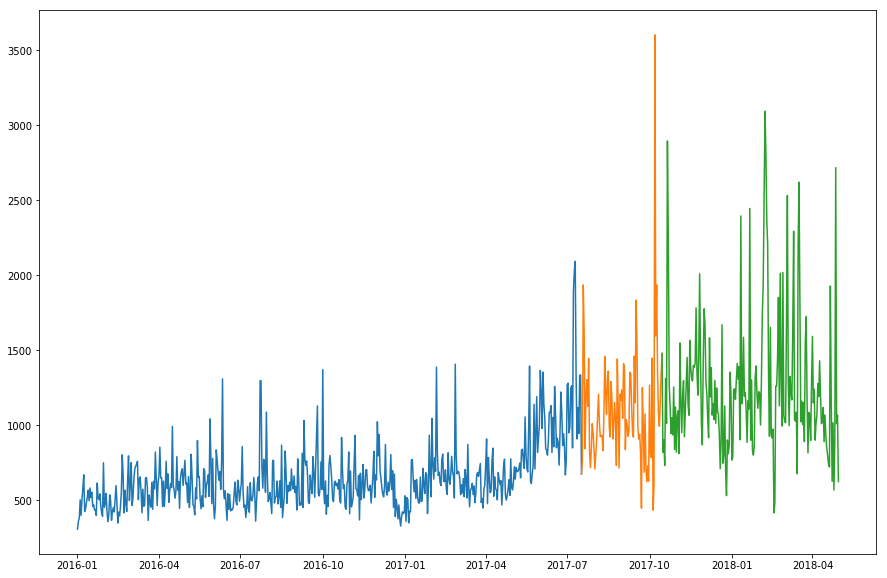

In [34]:
cc.make_plot(cpts)

# Example 2: bike data. Value is miles ridden per day? or rides or something

/Users/lfitzpatrick/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


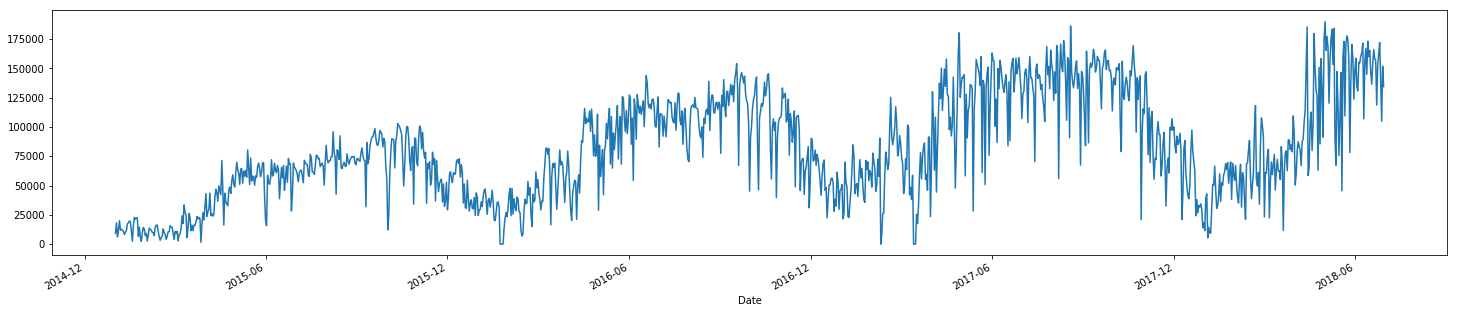

In [66]:
path = os.getcwd()
bike = pd.DataFrame()
for file in os.listdir('data/bike/')[1:]:
    bike = pd.concat([bike, pd.read_csv(path + '/data/bike/'+file)], axis=0)
    
bike.index = pd.DatetimeIndex(bike['Date'])

fig, ax = plt.subplots(figsize=(25,5))
bike['Miles traveled today (midnight to 11:59 pm)'].plot()

In [69]:
bike.index

DatetimeIndex(['2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04',
               '2017-07-05', '2017-07-06', '2017-07-07', '2017-07-08',
               '2017-07-09', '2017-07-10',
               ...
               '2016-09-21', '2016-09-22', '2016-09-23', '2016-09-24',
               '2016-09-25', '2016-09-26', '2016-09-27', '2016-09-28',
               '2016-09-29', '2016-09-30'],
              dtype='datetime64[ns]', name='Date', length=1277, freq=None)

In [70]:
bike.head()

,24-Hour Passes Purchased (midnight to 11:59 pm),3-Day Passes Purchased (midnight to 11:59 pm),7-Day Passes Purchased (midnight to 11:59 pm),Cumulative trips (since launch),Cumulative trips (since launch):,Date,Miles traveled to date,Miles traveled to date:,Miles traveled today (midnight to 11:59 pm),Total Annual Members (All Time),Total Annual Memberships Sold,Trips over the past 24-hours (midnight to 11:59pm)
Date,,,,,,,,,,,,
2017-07-01,2828,372.0,NaN,NaN,NaN,7/1/17,NaN,NaN,107126,228157.0,NaN,36737
2017-07-02,4314,458.0,NaN,NaN,NaN,7/2/17,NaN,NaN,128397,228306.0,NaN,43035
2017-07-03,3243,316.0,NaN,NaN,NaN,7/3/17,NaN,NaN,130240,228473.0,NaN,48193
2017-07-04,4929,315.0,NaN,NaN,NaN,7/4/17,NaN,NaN,146441,228669.0,NaN,49924
2017-07-05,1886,267.0,NaN,NaN,NaN,7/5/17,NaN,NaN,149487,228908.0,NaN,60321


In [85]:
tdf = bike.copy()

In [74]:
miles = 'Miles traveled today (midnight to 11:59 pm)'

In [109]:
bike.head()

,24-Hour Passes Purchased (midnight to 11:59 pm),3-Day Passes Purchased (midnight to 11:59 pm),7-Day Passes Purchased (midnight to 11:59 pm),Cumulative trips (since launch),Cumulative trips (since launch):,Date,Miles traveled to date,Miles traveled to date:,Miles traveled today (midnight to 11:59 pm),Total Annual Members (All Time),Total Annual Memberships Sold,Trips over the past 24-hours (midnight to 11:59pm)
Date,,,,,,,,,,,,
2017-07-01,2828,372.0,NaN,NaN,NaN,7/1/17,NaN,NaN,107126,228157.0,NaN,36737
2017-07-02,4314,458.0,NaN,NaN,NaN,7/2/17,NaN,NaN,128397,228306.0,NaN,43035
2017-07-03,3243,316.0,NaN,NaN,NaN,7/3/17,NaN,NaN,130240,228473.0,NaN,48193
2017-07-04,4929,315.0,NaN,NaN,NaN,7/4/17,NaN,NaN,146441,228669.0,NaN,49924
2017-07-05,1886,267.0,NaN,NaN,NaN,7/5/17,NaN,NaN,149487,228908.0,NaN,60321


In [118]:
bike.sort_index()

,24-Hour Passes Purchased (midnight to 11:59 pm),3-Day Passes Purchased (midnight to 11:59 pm),7-Day Passes Purchased (midnight to 11:59 pm),Cumulative trips (since launch),Cumulative trips (since launch):,Date,Miles traveled to date,Miles traveled to date:,Miles traveled today (midnight to 11:59 pm),Total Annual Members (All Time),Total Annual Memberships Sold,Trips over the past 24-hours (midnight to 11:59pm)
Date,,,,,,,,,,,,
2015-01-01,267,NaN,11,NaN,15216843,1/1/2015,NaN,26055797,9191,127279.0,NaN,5792
2015-01-02,298,NaN,8,NaN,15229214,1/2/2015,NaN,26074019,18222,127293.0,NaN,12371
2015-01-03,96,NaN,7,NaN,15234048,1/3/2015,NaN,26080301,6282,127300.0,NaN,4834
2015-01-04,152,NaN,5,NaN,15242557,1/4/2015,NaN,26092001,11700,127308.0,NaN,8509
2015-01-05,88,NaN,12,NaN,15258349,1/5/2015,NaN,26112023,20022,127336.0,NaN,15792
2015-01-06,2,NaN,1,NaN,15267832,1/6/2015,NaN,26124026,12003,127354.0,NaN,9483
2015-01-07,5,NaN,1,NaN,15278517,1/7/2015,NaN,26136817,12791,127363.0,NaN,10685
2015-01-08,18,NaN,0,NaN,15288294,1/8/2015,NaN,26148484,11667,127372.0,NaN,9777
2015-01-09,16,NaN,2,NaN,15296925,1/9/2015,NaN,26159577,11093,127376.0,NaN,8631


In [119]:
bike.sort_values(by='Date')

/Users/lfitzpatrick/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'Date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,24-Hour Passes Purchased (midnight to 11:59 pm),3-Day Passes Purchased (midnight to 11:59 pm),7-Day Passes Purchased (midnight to 11:59 pm),Cumulative trips (since launch),Cumulative trips (since launch):,Date,Miles traveled to date,Miles traveled to date:,Miles traveled today (midnight to 11:59 pm),Total Annual Members (All Time),Total Annual Memberships Sold,Trips over the past 24-hours (midnight to 11:59pm)
Date,,,,,,,,,,,,
2017-01-01,1237,33.0,NaN,NaN,NaN,1/1/17,NaN,NaN,50761,206624.0,NaN,16009
2015-01-01,267,NaN,11,NaN,15216843,1/1/2015,NaN,26055797,9191,127279.0,NaN,5792
2016-01-01,919,NaN,51,NaN,24371025,1/1/2016,NaN,44606414,24429,159362.0,NaN,11009
2018-01-01,123,7.0,NaN,NaN,NaN,1/1/2018,NaN,NaN,11483,253490.0,NaN,5499
2017-01-10,67,12.0,NaN,NaN,NaN,1/10/17,NaN,NaN,46216,206955.0,NaN,23232
2015-01-10,51,NaN,3,NaN,15303751,1/10/2015,NaN,26167766,8189,127383.0,NaN,6826
2016-01-10,391,NaN,18,NaN,24554929,1/10/2016,NaN,44930132,25404,159682.0,NaN,14275
2018-01-10,142,18.0,NaN,NaN,NaN,1/10/2018,NaN,NaN,50218,253720.0,NaN,28252
2017-01-11,208,37.0,NaN,NaN,NaN,1/11/17,NaN,NaN,63099,206981.0,NaN,32419


In [108]:
def _format_data(data, ycol, dcol=None):
    if dcol is None:
        if isinstance(data.index, pd.DatetimeIndex):
            return data[ycol].values, data.index.values
        else:
            print('Need to specify a date column')
    if dcol:
        if data[dcol].values.dtype == np.dtype('datetime64[ns]'):
            return data[ycol].values, data[dcol].values
        
        if data[dcol].values.dtype != np.dtype('datetime64[ns]'):
            return data[ycol].values, pd.to_datetime(data[dcol]).values
        
        
            
        

    

In [111]:
y, d = _format_data(bike, miles)

In [115]:
y, d = _format_data(bike, miles, 'Date')

array(['2017-07-01T00:00:00.000000000', '2017-07-02T00:00:00.000000000',
       '2017-07-03T00:00:00.000000000', ...,
       '2016-09-28T00:00:00.000000000', '2016-09-29T00:00:00.000000000',
       '2016-09-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [102]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [97]:
data[ycol]pd.DataFrame({'y':data[ycol]}, index = data.index)

NameError: name 'ycol' is not defined

In [107]:
tdf.index.values.dtype == np.dtype('datetime64[ns]')

True

In [106]:
isinstance(tdf.index.values, np.dtype('<M8[ns]'))

TypeError: isinstance() arg 2 must be a type or tuple of types

In [81]:
tdf[miles].values

array([107126, 128397, 130240, ..., 120072, 104364,  45194])

In [59]:
bike.head()

,24-Hour Passes Purchased (midnight to 11:59 pm),3-Day Passes Purchased (midnight to 11:59 pm),7-Day Passes Purchased (midnight to 11:59 pm),Cumulative trips (since launch),Cumulative trips (since launch):,Date,Miles traveled to date,Miles traveled to date:,Miles traveled today (midnight to 11:59 pm),Total Annual Members (All Time),Total Annual Memberships Sold,Trips over the past 24-hours (midnight to 11:59pm)
Date,,,,,,,,,,,,
2017-07-01,2828,372.0,NaN,NaN,NaN,7/1/17,NaN,NaN,107126,228157.0,NaN,36737
2017-07-02,4314,458.0,NaN,NaN,NaN,7/2/17,NaN,NaN,128397,228306.0,NaN,43035
2017-07-03,3243,316.0,NaN,NaN,NaN,7/3/17,NaN,NaN,130240,228473.0,NaN,48193
2017-07-04,4929,315.0,NaN,NaN,NaN,7/4/17,NaN,NaN,146441,228669.0,NaN,49924
2017-07-05,1886,267.0,NaN,NaN,NaN,7/5/17,NaN,NaN,149487,228908.0,NaN,60321


In [78]:
tdf = tdf.reset_index(drop=True)

In [79]:
format_df(tdf, miles)

AssertionError: Specify date column

In [67]:
cpbike = cp.cp2(bike, ycol='Miles traveled today (midnight to 11:59 pm)', delta=10)

ValueError: cannot label index with a null key

In [61]:
bike.index

DatetimeIndex(['2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04',
               '2017-07-05', '2017-07-06', '2017-07-07', '2017-07-08',
               '2017-07-09', '2017-07-10',
               ...
               '2016-09-21', '2016-09-22', '2016-09-23', '2016-09-24',
               '2016-09-25', '2016-09-26', '2016-09-27', '2016-09-28',
               '2016-09-29', '2016-09-30'],
              dtype='datetime64[ns]', name='Date', length=1277, freq=None)

In [25]:
%%time
cpts = cpbike.run()

testing 2017-07-01T00:00:00.000000000 to 2016-09-30T00:00:00.000000000
changepoint detected at 2018-05-31T00:00:00.000000000

testing 2017-07-01T00:00:00.000000000 to 2018-05-31T00:00:00.000000000
changepoint detected at 2017-08-30T00:00:00.000000000

testing 2018-06-01T00:00:00.000000000 to 2016-09-30T00:00:00.000000000
changepoint detected at 2017-05-29T00:00:00.000000000

testing 2017-07-01T00:00:00.000000000 to 2017-08-30T00:00:00.000000000
no changepoint detected 

testing 2017-08-31T00:00:00.000000000 to 2018-05-31T00:00:00.000000000
changepoint detected at 2017-11-03T00:00:00.000000000

testing 2018-06-01T00:00:00.000000000 to 2017-05-29T00:00:00.000000000
no changepoint detected 

testing 2017-05-30T00:00:00.000000000 to 2016-09-30T00:00:00.000000000
no changepoint detected 

testing 2017-08-31T00:00:00.000000000 to 2017-11-03T00:00:00.000000000
changepoint detected at 2016-05-29T00:00:00.000000000

testing 2017-11-04T00:00:00.000000000 to 2018-05-31T00:00:00.000000000
changepo

In [16]:
cpts.sort()

In [17]:
dr1 = pd.date_range(cpts[0], cpts[1])

In [18]:
bike.loc[dr1]

,24-Hour Passes Purchased (midnight to 11:59 pm),3-Day Passes Purchased (midnight to 11:59 pm),7-Day Passes Purchased (midnight to 11:59 pm),Cumulative trips (since launch),Cumulative trips (since launch):,Date,Miles traveled to date,Miles traveled to date:,Miles traveled today (midnight to 11:59 pm),Total Annual Members (All Time),Total Annual Memberships Sold,Trips over the past 24-hours (midnight to 11:59pm)
2015-08-28,1774,NaN,160,NaN,21054187,2015-08-28,NaN,36054629,74240,NaN,1.419430e+05,41418
2015-08-29,3470,NaN,197,NaN,21088240,2015-08-29,NaN,36129469,74840,NaN,1.421690e+05,34053
2015-08-30,2902,NaN,189,NaN,21120821,2015-08-30,NaN,36198459,68990,NaN,1.424960e+05,32581
2015-08-31,1197,NaN,194,NaN,21160864,2015-08-31,NaN,36266295,67836,NaN,1.430570e+05,40043
2015-09-01,1199,NaN,185,NaN,21203933,2015-09-01,NaN,36339234,72939,NaN,1.432390e+05,43069
2015-09-02,1244,NaN,162,NaN,21246937,2015-09-02,NaN,36412217,72983,NaN,1.434240e+05,43004
2015-09-03,1251,NaN,193,NaN,21289399,2015-09-03,NaN,36483482,71265,NaN,1.435810e+05,42462
2015-09-04,1843,NaN,211,NaN,21328971,2015-09-04,NaN,36554163,70681,NaN,1.437220e+05,39572
2015-09-05,4271,NaN,228,NaN,21362640,2015-09-05,NaN,36632119,77956,NaN,1.438540e+05,33669
2015-09-06,4571,NaN,200,NaN,21395515,2015-09-06,NaN,36714242,82123,NaN,1.439620e+05,32875


In [20]:
data = bike

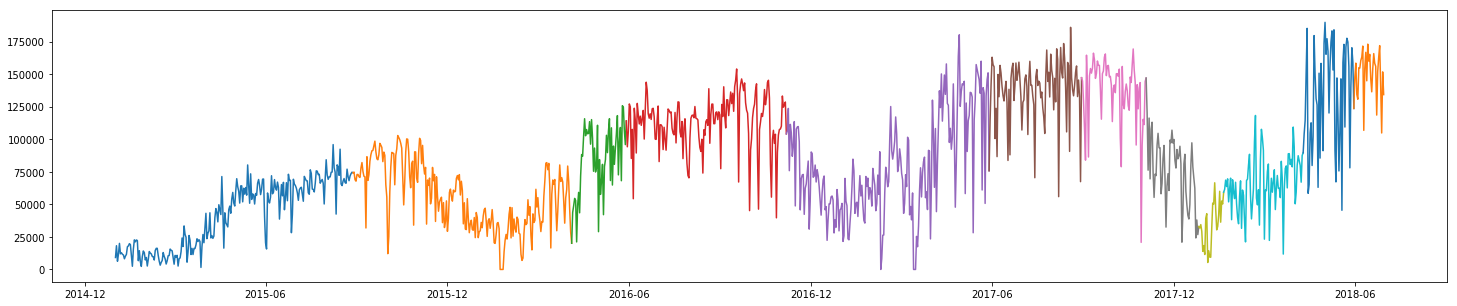

In [22]:

cpts = pd.to_datetime(cpts)
points = [data.index.min(), data.index.max()]
points.extend(cpts)
points.sort()
#points.sort()
segments = [pd.date_range(points[i], points[i+1]) for i in range(len(points)-1)]
fig, ax = plt.subplots(figsize=(25,5))
for seg in segments:
    plt.plot(data.loc[seg,'Date'], data.loc[seg, 'Miles traveled today (midnight to 11:59 pm)'])

In [23]:
cpts

DatetimeIndex(['2015-08-28', '2016-04-04', '2016-05-29', '2016-11-06',
               '2017-05-29', '2017-08-30', '2017-11-03', '2017-12-26',
               '2018-01-20', '2018-04-10', '2018-05-31'],
              dtype='datetime64[ns]', freq=None)

# Example 3: Fed funds rate
spoiler alert: the Fed makes explicitly clear when they change the upper and lower bounds of the target Fed Funds rate.

For those unfamiliar with the Federal Reserve, the federal funds rate (aka fed funds rate) is the weighted average of all overnight bank-to-bank loans. Historically, reserve requirements (legal requirements that depository institutions maintain a proportion of their deposits as reserves) precipitated a daily market in which banks short on reserves borrow other banks' extra reserves in order to meet their own requirements. Lending banks don't loan for free, of course - the weighted average of interest rates on all these overnight loans is the fed funds rate. It's a measure of how much liquidity is in the banking system, and is the Fed's "benchmark" interest rate. 

Historically, the Fed controlled the fed funds rate by buying and selling tbills, which are short-term government bonds. By buying tbills, the Fed injects liquidity (reserves) directly into the banking system. This boosts the supply of reserves, thereby lowering the price of reserves (the fed funds rate.) Selling tbills has the opposite effect.

After the banking crisis of 2008, this mechanism was replaced. Now, to affect a change in the fed funds rate, the Fed adjusts the interest paid on excess reserves. 

The important thing is that the Fed is GOOD at controlling the Fed funds rate, and announces changes to the target - this makes it an attractive candidate to test an offline changepoint detection algorithm. Unfortunately, it identifies several changepoints before the Fed started raising the fed funds rate. 

In [12]:
os.chdir('/users/lfitzpatrick/Desktop/randomdata/')
ffr = pd.read_csv('DFF.csv')


ffr = ffr.rename(columns={'DFF':'y', 'DATE':'ds'})

ffr['ds'] = pd.to_datetime(ffr['ds'])

ffr.index = pd.DatetimeIndex(ffr['ds'])

In [14]:
cpffr = cp.cp2(ffr, ycol='y', dcol='ds', delta=10)

In [15]:
cpts = cpffr.run()

testing 2013-09-22T00:00:00.000000000 to 2018-09-21T00:00:00.000000000
changepoint detected at 2018-05-21T00:00:00.000000000

testing 2013-09-22T00:00:00.000000000 to 2018-05-21T00:00:00.000000000
changepoint detected at 2018-01-13T00:00:00.000000000

testing 2018-05-22T00:00:00.000000000 to 2018-09-21T00:00:00.000000000
changepoint detected at 2018-07-27T00:00:00.000000000

testing 2013-09-22T00:00:00.000000000 to 2018-01-13T00:00:00.000000000
changepoint detected at 2017-07-14T00:00:00.000000000

testing 2018-01-14T00:00:00.000000000 to 2018-05-21T00:00:00.000000000
no changepoint detected 

testing 2018-05-22T00:00:00.000000000 to 2018-07-27T00:00:00.000000000
no changepoint detected 

testing 2018-07-28T00:00:00.000000000 to 2018-09-21T00:00:00.000000000
no changepoint detected 

testing 2013-09-22T00:00:00.000000000 to 2017-07-14T00:00:00.000000000
changepoint detected at 2017-04-14T00:00:00.000000000

testing 2017-07-15T00:00:00.000000000 to 2018-01-13T00:00:00.000000000
changepo

In [17]:
cpts.sort()

In [18]:
cpts

[numpy.datetime64('2014-12-28T00:00:00.000000000'),
 numpy.datetime64('2015-03-19T00:00:00.000000000'),
 numpy.datetime64('2015-05-09T00:00:00.000000000'),
 numpy.datetime64('2015-07-03T00:00:00.000000000'),
 numpy.datetime64('2015-08-23T00:00:00.000000000'),
 numpy.datetime64('2015-11-27T00:00:00.000000000'),
 numpy.datetime64('2016-01-17T00:00:00.000000000'),
 numpy.datetime64('2016-11-25T00:00:00.000000000'),
 numpy.datetime64('2017-02-22T00:00:00.000000000'),
 numpy.datetime64('2017-04-14T00:00:00.000000000'),
 numpy.datetime64('2017-07-14T00:00:00.000000000'),
 numpy.datetime64('2017-11-23T00:00:00.000000000'),
 numpy.datetime64('2018-01-13T00:00:00.000000000'),
 numpy.datetime64('2018-05-21T00:00:00.000000000'),
 numpy.datetime64('2018-07-27T00:00:00.000000000')]

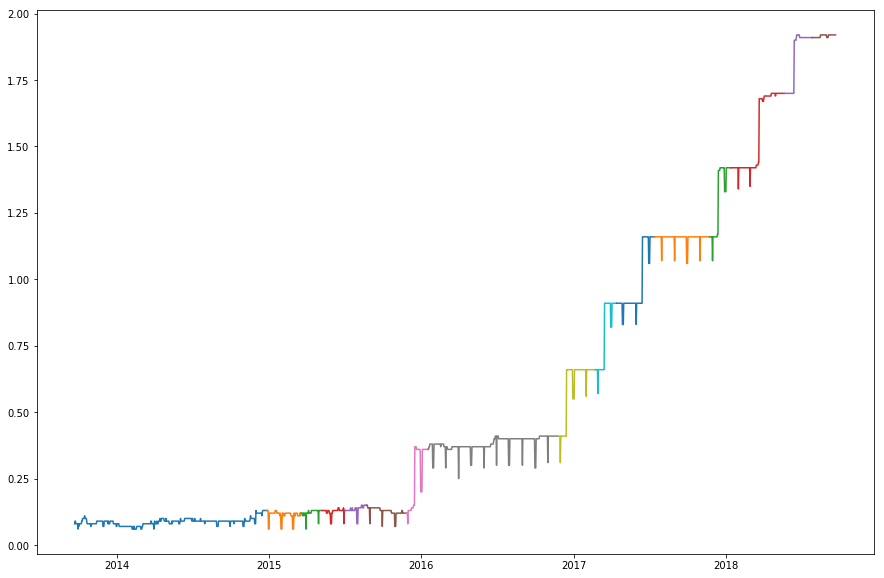

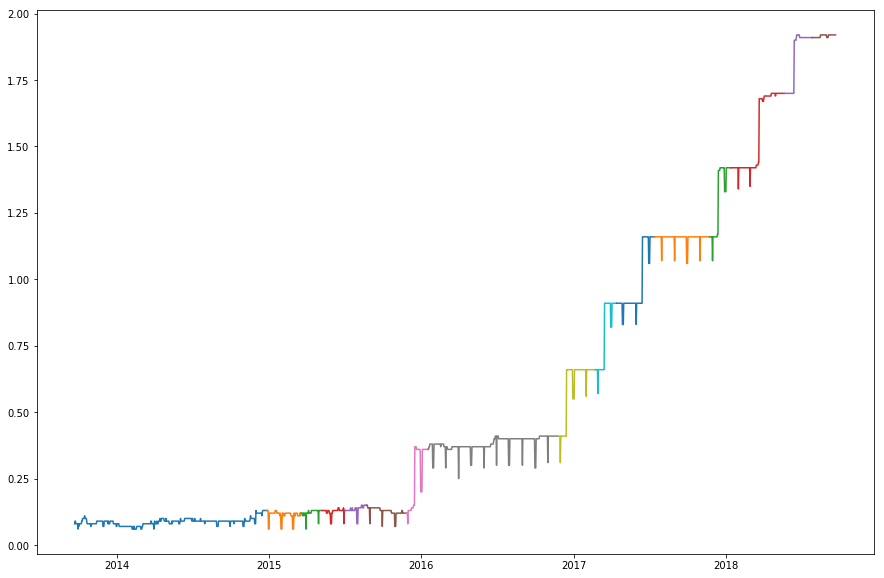

In [19]:
cpffr.make_plot(cpts)

In [22]:
ffr['2017']

,ds,y
ds,,
2017-01-01,2017-01-01,0.55
2017-01-02,2017-01-02,0.55
2017-01-03,2017-01-03,0.66
2017-01-04,2017-01-04,0.66
2017-01-05,2017-01-05,0.66
2017-01-06,2017-01-06,0.66
2017-01-07,2017-01-07,0.66
2017-01-08,2017-01-08,0.66
2017-01-09,2017-01-09,0.66


In [23]:
data

NameError: name 'data' is not defined

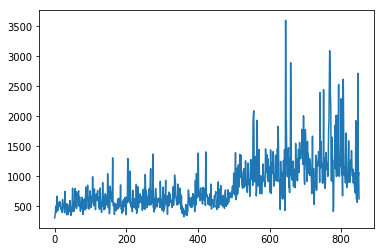

In [33]:
data['count'].plot()

In [42]:
y = data['count'].values

In [36]:
y0 = 0
p0 = 1

In [43]:
np.insert(y, 0,0)

array([   0,  307,  358,  380,  502,  399,  504,  580,  669,  424,  440,
        484,  522,  567,  496,  581,  517,  553,  458,  469,  435,  435,
        398,  614,  516,  503,  542,  461,  416,  392,  749,  453,  478,
        545,  418,  356,  404,  535,  496,  366,  424,  450,  421,  501,
        597,  488,  347,  420,  395,  456,  556,  802,  660,  415,  566,
        478,  424,  632,  795,  497,  600,  750,  465,  519,  642,  707,
        727,  739,  759,  503,  640,  655,  561,  416,  573,  459,  465,
        648,  651,  588,  365,  534,  483,  453,  618,  439,  625,  575,
        821,  638,  464,  616,  664,  853,  648,  649,  457,  627,  459,
        562,  759,  579,  675,  485,  561,  611,  583,  992,  596,  566,
        513,  565,  790,  567,  624,  445,  646,  691,  709,  598,  684,
        766,  607,  614,  484,  657,  451,  562,  806,  652,  469,  459,
        402,  582,  508,  897,  653,  658,  510,  442,  529,  455,  710,
        698,  518,  602,  621,  668,  525, 1042,  7

In [38]:
def xkhat(values, i, R=5):
    K = P[i-1]/(P[i-1]+R)
    x = xhat[i-1] + K *(Y)
    